<a href="https://colab.research.google.com/github/penguinlin777/data_processing/blob/main/dandan_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DanDan Requirements

2nd col -> 2nd maximum -> z

fig 1: x -> 4th col * 10 y -> 2nd

fig 2: x -> 1 / 开尔文(T) y -> 1 / z

fig 3: 拟合，GRG


In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

# Read File
First, connect to google drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# file pre-processing
PRE_FILE_PATH = "/content/drive/MyDrive/data/20220928_SY161" # change data floder path here
FILE_PATH = PRE_FILE_PATH + "/pre-processed"

if not os.path.exists(FILE_PATH):
  os.mkdir(FILE_PATH)

for file_name in os.listdir(PRE_FILE_PATH):
  if file_name == "pre-processed":
    continue
  with open(PRE_FILE_PATH + "/" + file_name, 'r') as fp:
    lines = fp.readlines()
  with open(FILE_PATH + "/" + file_name, 'w') as fp:
    for line in lines:
      if line[0] != '!':
        fp.write(line)

In [4]:
df_list = []
temp_list = []

def temp_convertor(center_degree):
  return center_degree + 273

for file_name in os.listdir(FILE_PATH):
  df = pd.read_csv(FILE_PATH + "/" + file_name, sep='\s+|\t| ', 
        header=None, error_bad_lines=False, skiprows=16)
  df = df.iloc[:, 0:4]
  shape_x, shape_y = df.shape
  if shape_y != 4:
    print("file name:" + file_name)
    raise Exception("Wrong file format")
  # print(file_name)
  # get temp from file name and convert to k
  temp = int(file_name[0:file_name.find('.')])  # change this line according to file name, python string processing
  converted_temp = temp_convertor(temp)
  temp_list.append(converted_temp)
  
  df_list.append(df)
  
def print_list(df_list, temp_list):
  for df, temp in zip(df_list, temp_list):
    print(temp)
    print(df.head(3))
print(df)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


          0          1          2         3
0     0.018  22.127844  20.640202  0.001280
1     0.019  26.551525  22.046707  0.001351
2     0.020  28.682642  22.170514  0.001422
3     0.021  25.803791  20.535055  0.001494
4     0.022  25.569384  19.885842  0.001565
...     ...        ...        ...       ...
3278  3.296   1.509856   0.379952  0.234393
3279  3.297   1.266822   0.348300  0.234464
3280  3.298   1.169471   0.334838  0.234536
3281  3.299   1.225080   0.342960  0.234607
3282  3.300   1.245733   0.346037  0.234678

[3283 rows x 4 columns]


In [5]:
# sort data base on temperature
def sort_data(x, y):
  xy = [(xi, yi) for xi, yi in zip(x, y)]
  sorted_xy = sorted(xy, key=lambda item: item[0])

  return [xi for xi, _ in sorted_xy], [yi for _, yi in sorted_xy]
temp_list, df_list = sort_data(temp_list, df_list)

print_list(df_list, temp_list)

403
       0          1          2         3
0  0.018  22.127844  20.640202  0.001280
1  0.019  26.551525  22.046707  0.001351
2  0.020  28.682642  22.170514  0.001422
413
       0          1          2         3
0  0.018  15.735256  17.405292  0.001280
1  0.019  10.753366  14.030437  0.001351
2  0.020   5.752568   9.928807  0.001422
423
       0          1          2         3
0  0.018  24.815315  21.857692  0.001280
1  0.019  27.295366  22.353393  0.001351
2  0.020  20.093681  18.556495  0.001422
433
       0          1          2         3
0  0.018  27.167974  22.870361  0.001280
1  0.019  29.160381  23.104448  0.001351
2  0.020  24.032331  20.293836  0.001422
443
       0          1          2         3
0  0.018  18.331694  18.786492  0.001280
1  0.019  20.066303  19.166053  0.001351
2  0.020  16.029137  16.573768  0.001422
453
       0          1          2         3
0  0.018  10.860204  14.459836  0.001280
1  0.019   4.288347   8.860209  0.001351
2  0.020   4.324613   8.608744  0

# Fig 1

x: 4th col * 10 

y: 2nd

[403, 413, 423, 433, 443, 453, 463, 473, 483, 493, 503, 513, 523, 533]


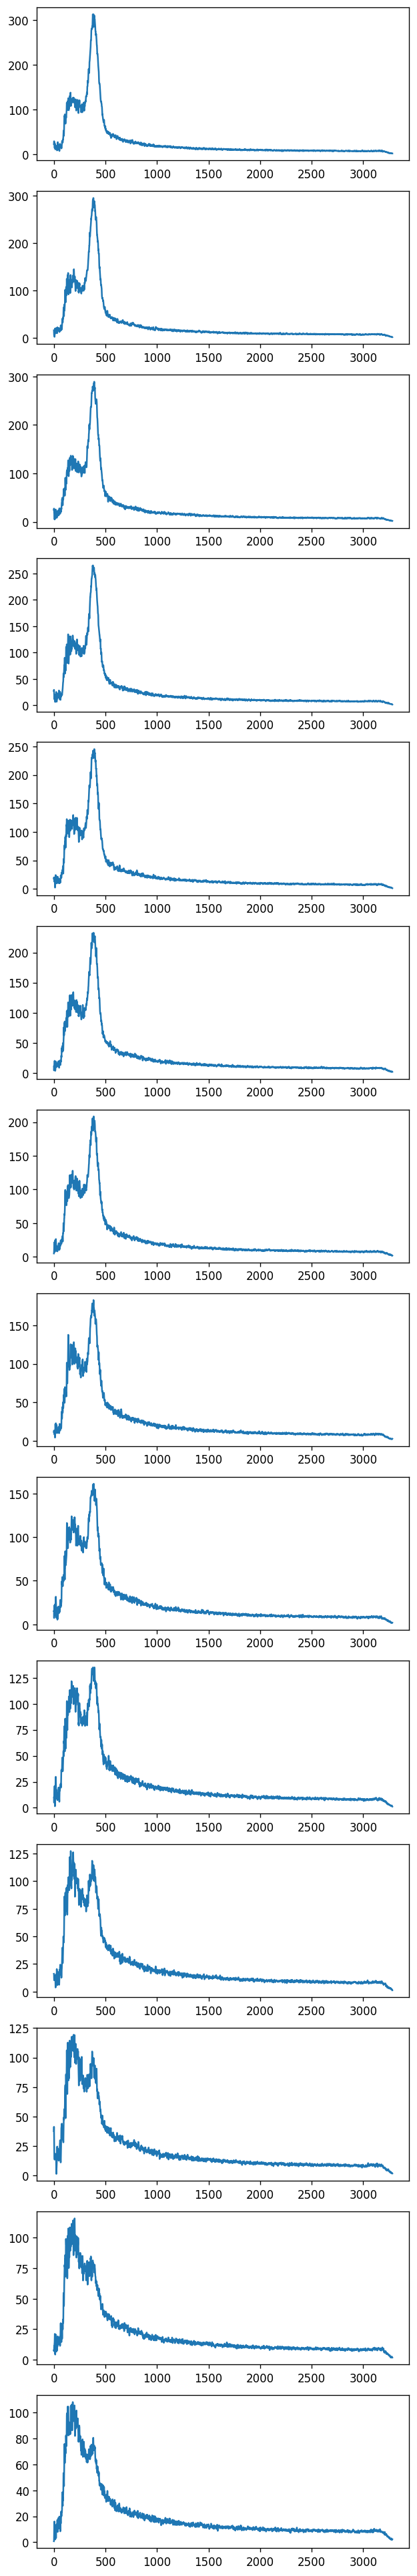

In [6]:
# sns.set()
sns.reset_orig()

# set figure size
plt.figure(figsize=(6, 3 * len(df_list)),dpi=120)

for i, df in enumerate(df_list):
  plt.subplot(len(df_list), 1, i + 1)
# plt.plot(df.iloc[:, 3] * 10, df.iloc[:, 1])   # Option 1: real x axis
  plt.plot(range(len(df.iloc[:, 1])), df.iloc[:, 1])  # Option 2: index
print(temp_list)

# Fig 2
Find second peaks with scipy

In [ ]:
# Option1: scipy find_peaks

# second_peaks = []
# peaks_value = []

# for i, df in enumerate(df_list):
#   data = df.iloc[:, 1]
#   res, _ = find_peaks(data, height=500, distance=100)

#   if len(res) != 2:
#     raise Exception("Find peaks error, you need to adjust parameters in find_peaks")
#   second_peaks.append([res[1], data[res[1]]])
#   peaks_value.append(data[res[1]])

# print(second_peaks)

In [7]:
# Option 2: region maximum

REGION_START = 350
REGION_END = 650

peaks_value = []

for df in df_list:
  data = df.iloc[:, 1]
  peaks_value.append(max(data[REGION_START:REGION_END]))

print(peaks_value)
print(temp_list)

[312.923462, 294.417419, 288.964325, 265.541504, 245.337082, 232.792999, 208.476761, 182.913773, 161.28093, 134.925812, 118.536499, 105.145157, 84.636078, 80.517654]
[403, 413, 423, 433, 443, 453, 463, 473, 483, 493, 503, 513, 523, 533]


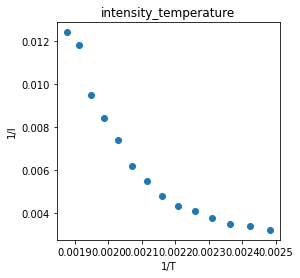

In [8]:
x = [1 / temp for temp in temp_list]
y = [1 / peak for peak in peaks_value]
x,y = sort_data(x, y)
# 画布大小 figsize, 清晰度 dpi
plt.figure(figsize=(4, 4))
# 图片标题 
plt.title('intensity_temperature')
# 轴标题
plt.xlabel('1/T')
plt.ylabel('1/I')

# print(temp_list, peaks_value)
plt.scatter(x[0:], y[0:], linewidth = 1.0, linestyle = '-')
plt.show()

# Fig 3

In [9]:
# linear regression

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import optimize
from scipy.optimize import leastsq

# x_fit = x[2:5]
# y_fit = y[2:5]
# z1 = np.polyfit(x_fit, y_fit, 1)
# p1 = np. poly1d(z1)
# y_fitted = p1(x_fit)
# plt.scatter(x_fit, y_fit)
# plt.plot(x_fit, y_fitted)
# plt.show
# res = st.linregress(x_fit, y_fit)
# plt.plot(x_fit, y_fit, 'o', label='original data')
# plt.plot(x_fit, res.intercept + res.slope*np.array(x_fit), 'r', label='fitted line')
# print(1/(res.intercept/((-1)*res.slope))-273)
# print(res.intercept)
# plt.legend()
# plt.figure(figsize=(4, 4),dpi=120)
# plt.scatter(x[:18],y[:18])
# plt.show()

# Fig 4

Fitting

Equations: @dandan

Objective:

The minimum of [the sum of least squares] for I_q_fit and I_q
note:

1. in dandan's case the subscript PMMA is PAGE
2. q is the forth column * 10
3. need rewrite: df.iloc[:, 3] * 10 is q; df.iloc[:, 1] is I_q
altering parameters (the last equation):
  - b_PS
  - b_PAGE
  - A_0
  - chi

Inputs: 
- M_w
- M_n
- M_n_PS
- a_1
- b_5
- m_S
- m_A
- rho_PS
- rho_PAGE
- v_nor = 118

Equation:
- w_PS = (m_S * b_5 / 5) / (m_A * a_1 + m_S * b_5 / 5)
- f_PS = w_PS / rho_PS / (w_PS / rho_PS + (1 - w_PS) / rho_PAGE)
- D_PS = D_PAGE = 1+(M_w / M_n - 1) / (w_PS ** 2 + (1 - w_PS))
- v_PS = m_S / rho_PS /  0.602
- v_PAGE = m_A / rho_PAGE / 0.602
- N_PS = v_PS * M_n_PS / v_nor / m_S
- N_PAGE = v_PAGE * (M_n - M_n_PS) / v_nor / m_A
- y_PS = N_PS * b_PS ** 2 * q ** 2 / 6
- y_PAGE = N_PAGE * b_PAGE ** 2 * q ** 2 / 6
- g1_PS = (1 - (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS
- g1_PAGE = (1 - (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE - 1) ** -1)) / y_PAGE
- g2_PS = 2 * (-1 + y_PS + (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS ** 2
- g2_PAGE = 2 * (-1 + y_PAGE + (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE -1) ** -1)) / y_PAGE ** 2
- rc = (v_PS * N_PS + v_PAGE * N_PAGE) / (v_PS * v_PAGE) ** 1/2
- s_PS_PS = rc * f_PS ** 2 * g2_PS
- s_PAGE_PAGE = rc * (1 - f_PS) ** 2 * g2_PS
- s_PS_PAGE = rc * f_PS * (1 - f_PS) * g1_PS * g1_PAGE
- S_q = s_PS_PS + 2 * s_PS_PAGE + s_PAGE_PAGE
- W_q = s_PS_PS * s_PAGE_PAGE - s_PS_PAGE ** 2
- I_q_fit = A_0 / (S_q / W_q - 2 * chi)

In [10]:
# # 需要用到的包

# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import optimize
# from scipy.optimize import curve_fit
# import warnings

# # input:
# M_wsec = 13000
# M_nsec = 12500
# M_n_PS = 6400
# a_1 = 1
# b_5 = 7.95
# m_S = 104
# m_A = 114
# rho_PS = 1.05
# rho_PAGE = 0.96
# v_nor = 118

# # 计算已知参数
# w_PS = (m_S * b_5 / 5) / (m_A * a_1 + m_S * b_5 / 5)
# M_n = M_n_PS / w_PS
# f_PS = w_PS / rho_PS / (w_PS / rho_PS + (1 - w_PS) / rho_PAGE)
# D_PS = 1+(M_wsec / M_nsec - 1) / (w_PS ** 2 + (1 - w_PS))
# D_PAGE = D_PS
# v_PS = m_S / rho_PS /  0.602
# v_PAGE = m_A / rho_PAGE / 0.602
# N_PS = v_PS * M_n_PS / v_nor / m_S
# N_PAGE = v_PAGE * (M_n - M_n_PS) / v_nor / m_A
# # 查看计算参数
# print(' w_PS = ', w_PS, 
#       '\n M_n = ', M_n, 
#       '\n f_PS = ', f_PS, 
#       '\n D_PS = ', D_PS, 
#       '\n v_PS = ', v_PS, 
#       '\n v_PAGE = ', v_PAGE, 
#       '\n N_PS = ', N_PS, 
#       '\n N_PAGE = ', N_PAGE)

In [ ]:
# # function
# def fun(q, b_PS, b_PAGE, A_0, chi):
#   # equation start from here
#   y_PS = (N_PS * (b_PS ** 2) * (q ** 2)) / 6
#   y_PAGE = (N_PAGE * (b_PAGE ** 2) * (q ** 2)) / 6
#   g1_PS = (1 - (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS
#   g1_PAGE = (1 - (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE - 1) ** -1)) / y_PAGE
#   g2_PS = 2 * ((-1 + y_PS + (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1))) / y_PS ** 2
#   g2_PAGE = 2 * ((-1 + y_PAGE + (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE - 1) ** -1))) / y_PAGE ** 2
#   rc = (v_PS * N_PS + v_PAGE * N_PAGE) / ((v_PS * v_PAGE) ** (1/2))
#   s_PS_PS = rc * (f_PS ** 2) * g2_PS
#   s_PAGE_PAGE = rc * ((1 - f_PS) ** 2) * g2_PAGE
#   s_PS_PAGE = rc * f_PS * (1 - f_PS) * g1_PS * g1_PAGE
#   S_q = s_PS_PS + 2 * s_PS_PAGE + s_PAGE_PAGE
#   W_q = s_PS_PS * s_PAGE_PAGE - (s_PS_PAGE ** 2)
#   return A_0 / ((S_q / W_q) - (2 * chi))

# # 图片样式设定
# plt.figure(figsize=(6, 6 * len(df_list)))

# # 画图
# # for i, df in enumerate(df_list):
# for i in (0,1):
#   START_REGION = 500
#   END_REGION  = 950
#   plt.subplot(len(df_list), 1, i + 1)
#   q = df.iloc[START_REGION: END_REGION, 3] * 10
#   y = df.iloc[START_REGION: END_REGION, 1]
#   n = len(q)                    
#   # popt是优化之后的三个参数，直接带入gauss使用
#   plt.plot(q, y, 'b+:', label='data')
#   plt.plot(q, fun(q, 10, 10, 10, 0.01), 'ro:', label='fit')
#   plt.legend()

In [ ]:

# # 图片样式设定
# plt.figure(figsize=(6, 6 * len(df_list)))

# # fitting 部分
# fit_opt = []  # fitting parameters

# for i, df in enumerate(df_list):
#   START_REGION = 200
#   END_REGION  = 500
#   plt.subplot(len(df_list), 1, i + 1)
#   q = df.iloc[START_REGION: END_REGION, 3] * 10
#   y = df.iloc[START_REGION: END_REGION, 1]
#   n = len(q)                    
#   popt, pcov = curve_fit(fun, q, y, p0=[5.5, 5.5, 5.6, 0.055])
#   fit_opt.append(popt)
#   # popt是优化之后的三个参数，直接带入gauss使用
#   plt.plot(q, y, 'b+:', label='data')
#   plt.plot(q, fun(q, *popt), 'ro:', label='fit')
#   plt.legend()

# Fig 5

Gaussian fitting of second peak in Fig 1

0.2992270467286894
0.2993627868553989
0.299730028285273
0.29997167305213496
0.2999116359239662
0.3003049675771738
0.3009253501981961
0.301835279808528
0.30236556329023784
0.30349897076620186
0.3045870161602373
0.3054194868020427
0.30588522996466805
0.306586636393323


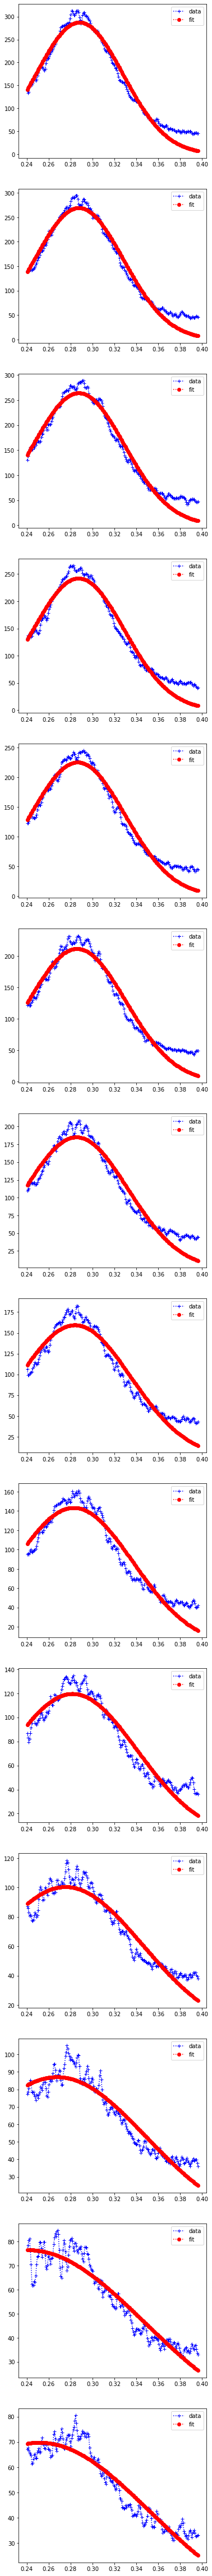

In [19]:
from scipy.optimize import curve_fit
import warnings
import numpy as np

warnings.filterwarnings('ignore')

def gaus(x, a, x0, sigma):
  return a * (1/(sigma * (np.sqrt(2*np.pi)))) *np.exp(-(x - x0)**2 / (2 * sigma**2))

plt.figure(figsize=(6, 6 * len(df_list)))

fit_opt = []  # fitting parameters

for i, df in enumerate(df_list):
  START_REGION = 320
  END_REGION  = 540
  plt.subplot(len(df_list), 1, i + 1)
  x = df.iloc[START_REGION: END_REGION, 3] * 10
  y = df.iloc[START_REGION: END_REGION, 1]
  n = len(x)                    
  mean = sum(x * y) / sum(y)
  sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

  popt, pcov = curve_fit(gaus, x, y, p0=[1, mean, sigma])
  fit_opt.append(popt)
  # popt是优化之后的三个参数，直接带入gauss使用
  plt.plot(x, y, 'b+:', label='data')
  plt.plot(x, gaus(x, *popt), 'ro:', label='fit')
  print(mean)
  plt.legend()

FWHM:0.09361
FWHM:0.09590
FWHM:0.09829
FWHM:0.09861
FWHM:0.10184
FWHM:0.10467
FWHM:0.11078
FWHM:0.12063
FWHM:0.12798
FWHM:0.13932
FWHM:0.16599
FWHM:0.19206
FWHM:0.24992
FWHM:0.23829


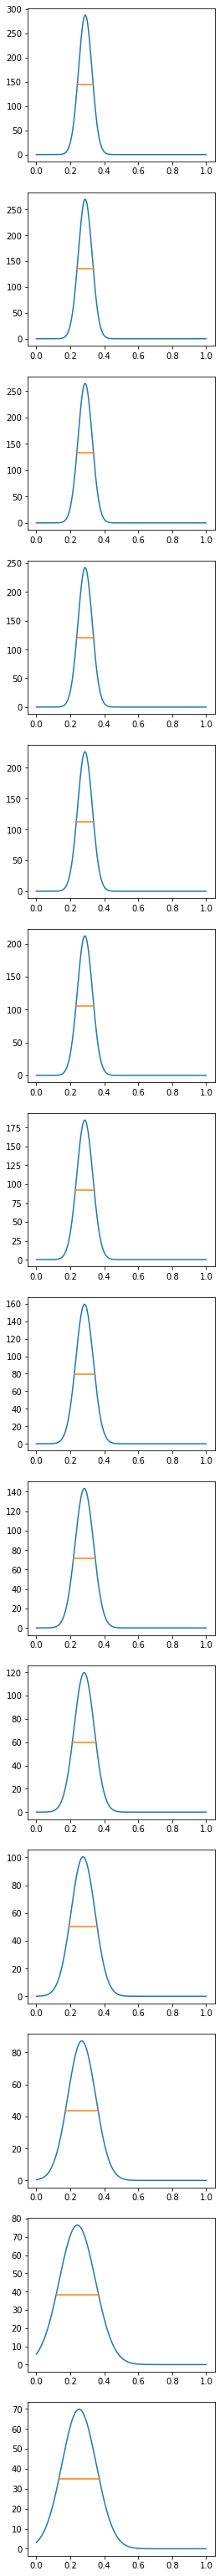

In [20]:
# 峰值的半峰宽度
def peak(x, c):
  return np.exp(-np.power(x - c, 2) / 16.0)

def lin_interp(x, y, i, half):
  return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
  half = (max(y) - min(y)) / 2.0
  signs = np.sign(np.add(y, -half))
  zero_crossings = (signs[0:-2] != signs[1:-1])
  zero_crossings_i = np.where(zero_crossings)[0]
  
  if len(zero_crossings_i) != 2:
    raise Exception("You should check START_GEN and END_GEN")
  
  return [lin_interp(x, y, zero_crossings_i[0], half), lin_interp(x, y, zero_crossings_i[1], half)]

START_GEN = 0   # region start and end
END_GEN = 1
hw_result = []    # store result

plt.figure(figsize=(4, 4 * len(df_list)))

for i, opt in enumerate(fit_opt):
  x = np.linspace(START_GEN, END_GEN, 1000)
  y = gaus(x, *opt)

  # find the two crossing points
  hmx = half_max_x(x, y)

  # print the answer
  fwhm = hmx[1] - hmx[0]
  hw_result.append(fwhm)
  print("FWHM:{:.5f}".format(fwhm))

  # a convincing plot
  half = max(y) / 2.0

  # plot
  plt.subplot(len(df_list), 1, i + 1)
  plt.plot(x, y)
  plt.plot(hmx, [half, half])

# Fig 6

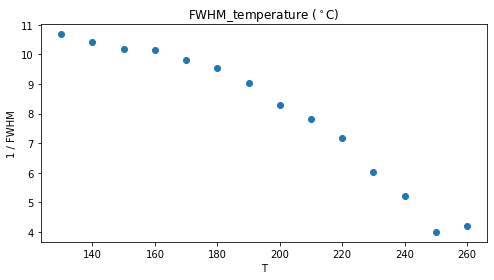

             0
10.683015  130
10.427983  140
10.173701  150
10.141334  160
9.819179   170
9.554153   180
9.026504   190
8.289901   200
7.813884   210
7.177773   220
6.024487   230
5.206819   240
4.001318   250
4.196591   260


In [21]:
from tabulate import tabulate

x = [temp - 273 for temp in temp_list]
y = [1 / hw for hw in hw_result]

x, y = sort_data(x, y)

# 画布大小 figsize, 清晰度 dpi
plt.figure(figsize=(8, 4))
# 图片标题 
plt.title('FWHM_temperature ($^\circ$C)')
# 轴标题
plt.xlabel('T')
plt.ylabel('1 / FWHM')
# 画布粗细和刻度
plt.scatter(x[0:], y[0:], linewidth = 1.0, linestyle = '-')
plt.show()
df = pd.DataFrame(x[0:],y[0:])
print(df)

# Fig 7

ValueError: ignored

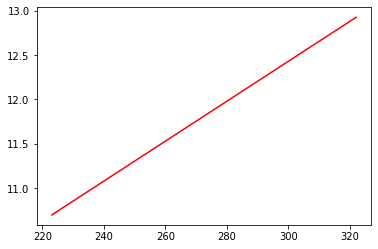

In [ ]:
import numpy as np
import sympy

x_fit1 = x[10:16]
y_fit1 = y[10:16]

res1 = st.linregress(x_fit1, y_fit1)
# plt.scatter(x_fit1, y_fit1, color='b', label='original data')
x_fitted1 = np.linspace(0.97 * x_fit1[0], 1.15 * x_fit1[len(x_fit1) - 1], 20)   # x coordination
plt.plot(x_fitted1, res1.intercept + res1.slope*np.array(x_fitted1), 'r', label='fitted line')

x_fit2 = x[21:]
y_fit2 = y[21:]
res2 = st.linregress(x_fit2, y_fit2)
# plt.scatter(x_fit2, y_fit2, color='b', label='original data')
x_fitted2 = np.linspace(0.96 * x_fit2[0], 1.02 * x_fit2[len(x_fit2) - 1], 20)   # x coordination
plt.plot(x_fitted2, res2.intercept + res2.slope*np.array(x_fitted2), 'r', label='fitted line')

# cal intersection
inter_x = (res1.intercept - res2.intercept) / (res2.slope - res1.slope)
inter_y = res2.intercept + res2.slope * inter_x
plt.scatter(inter_x, inter_y, color='r')
# plt.figure(figsize=(6, 4),dpi=200)

# 图片标题 
plt.title('FWHM_temperature')
# 轴标题
plt.xlabel('T  ($^\circ$C)')
plt.ylabel('1 / FWHM')
plt.scatter(x[10:], y[10:], color='b', linewidth = 1.0, linestyle = '-')
print(f'x = {inter_x}, y = {inter_y}')
plt.savefig('0310-2-4.svg')

In [ ]:
import numpy as np
import scipy
# define a fitting function
# including 自变量x, 振幅amplitude, 对称中心center, 标准差sigma 
# 该表达式是一个带振幅值amplitude的高斯函数表达式
def _1gaussian(x, amp1, cen1, sigma1):
  return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))
# scipy function用来进行曲线的拟合。原理如下：
# 残差平方和RSS（the sum of the squared residuals of f(xdata, *popt) - ydata）最小
# 标准差（perr = np.sqrt(np.diag(pcov)))
# popt_gauss, pcov_gauss = scipy.optimize.curve_fit(_1gaussian, x_array, y_array_gauss, p0 = [amp1, cen1, sigma1])
# perr_gauss = np.sqrt(np.diag(prov_gauss))
